In [3]:
import os
import glob
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [11]:
org_results = 'tests/data/diopsis_results/response.json'
isam_results = 'tests/data/diopsis_results/response_isam.json'
lama_results = 'tests/data/diopsis_results/response_lama.json'

flower_night_results = 'tests/data/diopsis_results/flower_night.json'
flower_night_isam_results = 'tests/data/diopsis_results/flower_night_isam.json'

In [13]:
org_json = json.load(open(org_results))
isam_json = json.load(open(isam_results))
lama_json = json.load(open(lama_results))

flower_night_json = json.load(open(flower_night_results))
flower_night_isam_json = json.load(open(flower_night_isam_results))

In [19]:
print('org results:')
print('predictions: ', len(org_json['predictions']))
print('regiona groups: ', len(org_json['region_groups']))

print('isam results:')
print('predictions: ', len(isam_json['predictions']))
print('regiona groups: ', len(isam_json['region_groups']))

print('lama results:')
print('predictions: ', len(lama_json['predictions']))
print('regiona groups: ', len(lama_json['region_groups']))

org results:
predictions:  36
regiona groups:  36
isam results:
predictions:  9
regiona groups:  9
lama results:
predictions:  33
regiona groups:  33


In [65]:
org_json['region_groups'][0]['individual_id']
round(org_json['predictions'][0]['taxa']['items'][0]['probability'], 2)

0.88

In [19]:
img_rgb = cv2.cvtColor(cv2.imread('tests/data/flower-night_yellow_l.jpg'), cv2.COLOR_BGR2RGB)
img_h, img_w = img_rgb.shape[:2]

# select the json file to visualize
json_file = flower_night_json
name = 'lama'
path = 'tests/data/diopsis_results/flower-night_yellow_l_'
ext = '.jpg'

predictions = json_file['predictions']
region_groups = json_file['region_groups']
for obj in region_groups:
    x1 = int(obj['regions'][0]['box']['x1']*img_w)
    x2 = int(obj['regions'][0]['box']['x2']*img_w)
    y1 = int(obj['regions'][0]['box']['y1']*img_h)
    y2 = int(obj['regions'][0]['box']['y2']*img_h)
    individual_id = obj['individual_id']
    for pred in predictions:
        if pred['region_group_id'] == individual_id:
            label = pred['taxa']['items'][0]['name']
            prob = pred['taxa']['items'][0]['probability']
            break
    cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (255,0,0), 2)
    cv2.putText(img_rgb, label+str(round(prob, 2)), (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,0,0), 2)
cv2.imwrite(str(path) + str(name) + str(ext), cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))

True

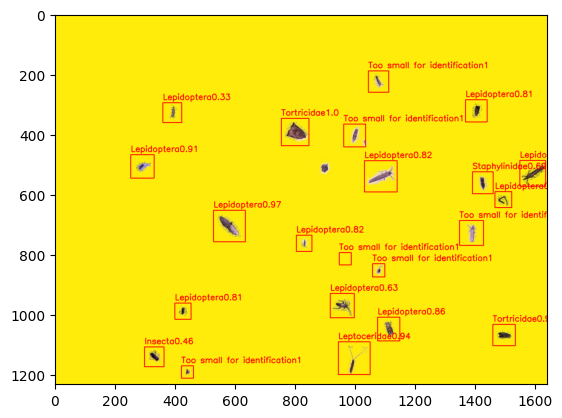

In [8]:
plt.imshow(img_rgb)